In [27]:
%load_ext autoreload
%autoreload
from src import *
from src.analysis import *
user = 'cook'
nodes = f'{proj_id}.redistricting_data.nodes_TX_2020_cntyvtd_cd'
for s in range(200, 201):
    seed = str(s).rjust(4, '0')
    rpt(f'analyzing {seed}')
    tbl = f'{proj_id}.redistricting_results_{user}.TX_2020_cntyvtd_cd_seed_{seed}'
    analysis = Analysis(nodes=nodes, tbl=tbl)
    fig = analysis.plot(show=False)
    analysis.get_results()
    print(f'done!\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
analyzing 0200 ... map creation for 0200 ... 

Loading BokehJS ...

success ... graph copy for 0200 ... success ... summary copy for 0200 ... success ... results calculation for 0200 ... success ... done!



In [27]:
tx = analysis.gdf.dissolve().buffer(0)

In [28]:
tx

0    POLYGON ((-95.58186 28.72492, -95.62523 28.702...
dtype: geometry

In [29]:
for k in range(102004,102007):
    p = tx.to_crs(f'ESRI:{k}').boundary.length[0] / meters_per_mile
    a = tx.to_crs('ESRI:102003').area[0] / (meters_per_mile**2)
    print(k, p, a)

102004 3639.581448907353 268595.8992982223
102005 3629.854002941245 268595.8992982223
102006 3618.5460341938365 268595.8992982223


In [31]:
analysis.gdf['p']

,geoid,plan_0,plan_1,plan_2,plan_3,county,total_pop,density,aland,perim,polsby_popper,geometry
0,001,5,5,5,5,Anderson,57922,54.508832,1062.616781,232.697418,24.66,"POLYGON ((-95.79665 31.63106, -95.79673 31.632..."
1,003,11,11,11,11,Andrews,18610,12.400704,1500.721275,159.944796,73.72,"POLYGON ((-102.65164 32.08686, -102.65168 32.0..."
2,005,1,1,1,1,Angelina,86395,108.282732,797.864980,214.461268,21.80,"POLYGON ((-94.86642 31.20903, -94.86643 31.209..."
3,007,27,27,27,27,Aransas,23830,94.537452,252.069412,125.078117,20.25,"POLYGON ((-97.21944 28.01859, -97.22094 28.020..."
4,009,13,13,13,13,Archer,8560,9.476478,903.289152,121.729138,76.60,"POLYGON ((-98.95379 33.52771, -98.95378 33.530..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5334,4990004-4,5,5,5,5,Wood,1204,136.810873,8.800470,21.204968,24.59,"POLYGON ((-95.42158 32.80024, -95.42159 32.799..."
5335,501,19,19,19,19,Yoakum,7694,9.620927,799.715053,113.241075,78.37,"POLYGON ((-103.06207 33.12432, -103.06207 33.1..."
5336,503,19,19,19,19,Young,17867,19.537488,914.498313,122.263842,76.88,"POLYGON ((-98.46627 33.39610, -98.46227 33.396..."
5337,505,28,28,28,28,Zapata,13889,13.911086,998.412322,148.307126,57.04,"POLYGON ((-98.95432 27.01162, -98.95431 27.010..."


In [21]:
s = 1
A = s**2
P = 4*s

e=2 
w=1
l=e*w
A=l*w
P=2*l+2*w

# r = 1
# A = np.pi*r**2
# P = 2*np.pi*r
pp = 4*np.pi*A / (P**2) * 100
pp

69.81317007977317

In [26]:
# e = np.linspace(0, 2, 100)[1:]
# pp = np.pi*e/(1+e)**2
# plt.plot(e,pp)
# # [np.pi*e/(1+e)**2]

# x/(1+x)^2

# (1+x)^2 - 2x(1+x)
# 4-4

np.pi/4

0.7853981633974483

<AxesSubplot:>

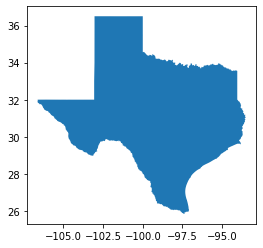

In [30]:
tx.plot()

In [10]:
from src import *
p = '/home/jupyter/results/TX_2020_cntyvtd_cd_seed_0002/TX_2020_cntyvtd_cd_seed_0002_graph.gpickle'
g = nx.read_gpickle(p)
len(g.nodes)

5339

In [4]:
[x for x in range(10) if x != 5]

[0, 1, 2, 3, 4, 6, 7, 8, 9]

In [66]:
%load_ext autoreload
%autoreload
from src import *

for seed in range(2,64):
    print(seed)
    tbl = f'{proj_id}.redistricting_results_{user}.TX_2020_cntyvtd_cd_seed_' + str(seed).rjust(4, '0') + '_stats'
    tbl_temp = tbl+'_temp'
    query = f"""
    select
        *
    from
        {tbl}
    """
    load_table(tbl=tbl_temp, query=query)

    cols = ['geoid as cd'] + get_cols(tbl)
    query = f"""
    select
        {join_str(1).join(cols)}
    from
        {tbl_temp}
    """
    load_table(tbl=tbl, query=query)
    delete_table(tbl=tbl_temp)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [21]:
self = analysis
analysis.results
fn = self.results_path / f'{self.run}_results.csv'
self.results.to_csv(fn)

ValueError: Could not find <colormap> with name Turbo256. The following predefined colormaps are supported (see also https://bokeh.pydata.org/en/latest/docs/reference/palettes.html ): ['YlGn', 'YlGnBu', 'GnBu', 'BuGn', 'PuBuGn', 'PuBu', 'BuPu', 'RdPu', 'PuRd', 'OrRd', 'YlOrRd', 'YlOrBr', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'Greys', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdBu', 'RdGy', 'RdYlBu', 'Spectral', 'RdYlGn', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'Category10', 'Category20', 'Category20b', 'Category20c', 'Colorblind', 'Magma', 'Inferno', 'Plasma', 'Viridis', 'Cividis', 'Turbo', 'Bokeh']